In [2]:
!pip install geopandas
!pip install pandas

In [3]:
import geopandas as gpd
import pandas as pd

In [4]:
shp_file = gpd.read_file('/content/nz_glaciers_polygons.shp')
csv_file = pd.read_csv('/content/nz_glacier_change_non_nan.csv')

In [15]:
gla_glims = shp_file
gla_wgms = csv_file

In [6]:
print(gla_glims.head())

print(gla_glims.columns)


    line_type   anlys_id         glac_id           anlys_time       area  \
0  glac_bound  1054183.0  G170910E43118S  2020-09-09T00:00:00   3.916670   
1  glac_bound  1054265.0  G172719E42080S  2020-09-09T00:00:00   0.530637   
2  glac_bound  1054031.0  G169791E43889S  2020-09-09T00:00:00   1.520170   
3  glac_bound  1053966.0  G168618E44432S  2020-09-09T00:00:00   1.266290   
4  glac_bound    97120.0  G170012E43673S  2010-07-01T00:00:00  70.890000   

    db_area  width  length  primeclass  min_elev  ...  gtng_o1reg  gtng_o2reg  \
0  3.916960    0.0     0.0         0.0       0.0  ...        18.0         1.0   
1  0.531023    0.0     0.0         0.0       0.0  ...        18.0         1.0   
2  1.518870    0.0     0.0         0.0       0.0  ...        18.0         1.0   
3  1.263470    0.0     0.0         0.0       0.0  ...        18.0         1.0   
4  0.708464    0.0     0.0         0.0       0.0  ...        18.0         1.0   

  rgi_gl_typ loc_unc_x loc_unc_y glob_unc_x glob_unc_y  

In [7]:
print(gla_glims.info())

print(gla_wgms.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9032 entries, 0 to 9031
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   line_type   9032 non-null   object  
 1   anlys_id    9032 non-null   float64 
 2   glac_id     9032 non-null   object  
 3   anlys_time  9032 non-null   object  
 4   area        9032 non-null   float64 
 5   db_area     9032 non-null   float64 
 6   width       9032 non-null   float64 
 7   length      9032 non-null   float64 
 8   primeclass  9032 non-null   float64 
 9   min_elev    9032 non-null   float64 
 10  mean_elev   9032 non-null   float64 
 11  max_elev    9032 non-null   float64 
 12  src_date    9032 non-null   object  
 13  rec_status  9032 non-null   object  
 14  glac_name   9032 non-null   object  
 15  wgms_id     9032 non-null   object  
 16  local_id    9032 non-null   object  
 17  glac_stat   9032 non-null   object  
 18  gone_date   9032 non-null   object  
 19

In [11]:
for column in gla_glims.columns:
    print(f"Column: {column}")
    print(gla_glims[column].unique())
    print("\n")


Column: line_type
['glac_bound' 'intrnl_rock']


Column: anlys_id
[1054183. 1054265. 1054031. ... 1054029. 1053940. 1053936.]


Column: glac_id
['G170910E43118S' 'G172719E42080S' 'G169791E43889S' ... 'G168276E44820S'
 'G172428E42164S' 'G171135E43078S']


Column: anlys_time
['2020-09-09T00:00:00' '2010-07-01T00:00:00' '2022-02-15T00:00:00'
 '2020-08-01T00:00:00']


Column: area
[3.91667  0.530637 1.52017  ... 1.87162  0.764732 1.79226 ]


Column: db_area
[3.91696  0.531023 1.51887  ... 1.86994  0.762872 1.78786 ]


Column: width
[0.]


Column: length
[0.]


Column: primeclass
[0.]


Column: min_elev
[   0. 1876. 2164. ... 2590. 2409. 2203.]


Column: mean_elev
[0.]


Column: max_elev
[0.]


Column: src_date
['1600-09-09T00:00:00' '2009-02-17T22:38:29' '2016-03-11T00:00:00'
 '2019-03-28T00:00:00']


Column: rec_status
['okay']


Column: glac_name
['None' 'JALF' 'ROUTE' 'FRESHFIELD' 'MORSE' 'BOYS']


Column: wgms_id
['None']


Column: local_id
['None']


Column: glac_stat
['exists']


Col

In [16]:
columns_to_drop = [
    'wgms_id', 'local_id', 'glac_stat', 'gone_date', 'gone_dt_e',
    'subm_id', 'rc_id', 'chief_affl', 'conn_lvl', 'surge_type',
    'term_type', 'gtng_o1reg', 'gtng_o2reg', 'rgi_gl_typ', 'loc_unc_x',
    'loc_unc_y', 'glob_unc_x', 'glob_unc_y', 'submitters', 'analysts',
    'mean_elev', 'max_elev', 'width', 'length', 'primeclass',
    'rec_status', 'proc_desc'
]
gla_glims_cleaned = gla_glims.drop(columns=columns_to_drop)

print(gla_glims_cleaned.head())


    line_type   anlys_id         glac_id           anlys_time       area  \
0  glac_bound  1054183.0  G170910E43118S  2020-09-09T00:00:00   3.916670   
1  glac_bound  1054265.0  G172719E42080S  2020-09-09T00:00:00   0.530637   
2  glac_bound  1054031.0  G169791E43889S  2020-09-09T00:00:00   1.520170   
3  glac_bound  1053966.0  G168618E44432S  2020-09-09T00:00:00   1.266290   
4  glac_bound    97120.0  G170012E43673S  2010-07-01T00:00:00  70.890000   

    db_area  min_elev             src_date glac_name           release_dt  \
0  3.916960       0.0  1600-09-09T00:00:00      None  2020-08-25T09:00:00   
1  0.531023       0.0  1600-09-09T00:00:00      None  2020-08-25T09:00:00   
2  1.518870       0.0  1600-09-09T00:00:00      None  2020-08-25T09:00:00   
3  1.263470       0.0  1600-09-09T00:00:00      None  2020-08-25T09:00:00   
4  0.708464       0.0  2009-02-17T22:38:29      None  2010-08-17T02:53:02   

     geog_area                                           geometry  
0  New Zeala

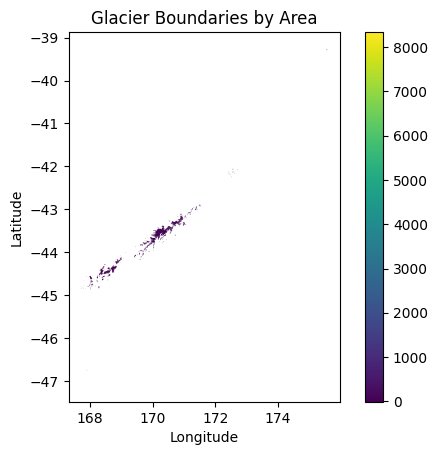

In [21]:
import matplotlib.pyplot as plt


gla_glims_cleaned.plot(column='area', cmap='viridis', legend=True)

plt.title('Glacier Boundaries by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


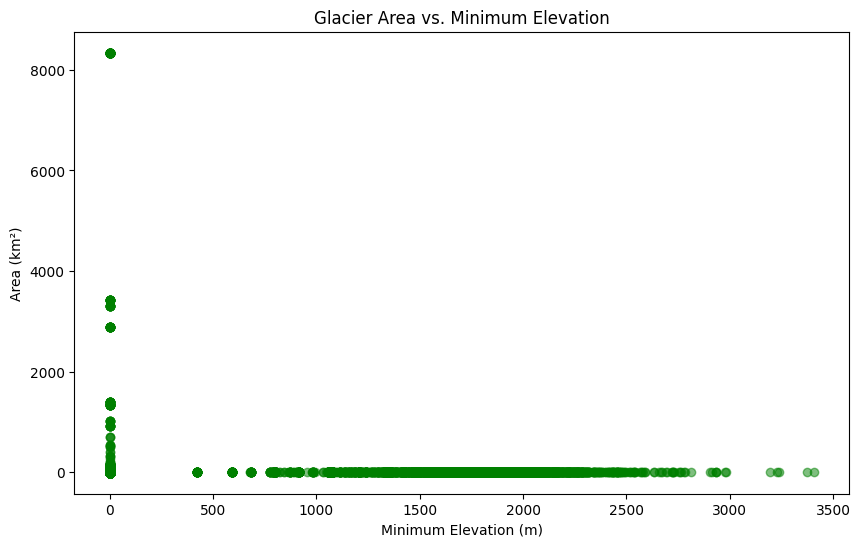

In [23]:

plt.figure(figsize=(10, 6))
plt.scatter(gla_glims_cleaned['min_elev'], gla_glims_cleaned['area'], alpha=0.5, color='green')
plt.title('Glacier Area vs. Minimum Elevation')
plt.xlabel('Minimum Elevation (m)')
plt.ylabel('Area (km²)')
plt.show()


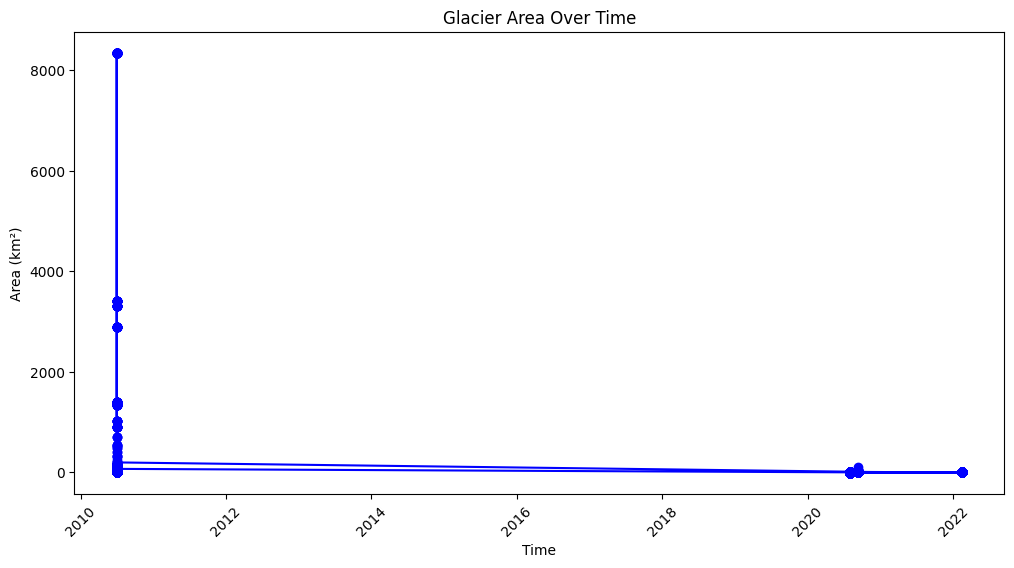

In [24]:
gla_glims_cleaned['anlys_time'] = pd.to_datetime(gla_glims_cleaned['anlys_time'])

plt.figure(figsize=(12, 6))
plt.plot(gla_glims_cleaned['anlys_time'], gla_glims_cleaned['area'], marker='o', linestyle='-', color='blue')
plt.title('Glacier Area Over Time')
plt.xlabel('Time')
plt.ylabel('Area (km²)')
plt.xticks(rotation=45)
plt.show()
